# SC,,  C0275: Introdução a Ciência de Dados - 2o Semestre de 2021

# P1

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Alunos:


1.  Éverton Luís Mendes da Silva(10728171)

# Parte 1

Suponha que duas cidades diferentes tenham te fornecido as temperaturas máximas (celsius) durante diferente dias do ano.
Os dados foram disponibilizados no arquivo "cidades.csv".

As leituras estão em ordem cronológica, porém, o sensor da cidade 1 falhou em alguns dias.

# Questão 1

- a) Para a cidade 1, substitua os valores ausentes pela média das leituras do dia anterior e do dia seguinte.  (1 pt)
- b) Calcule a média e a variância de temperatura no ano para cada cidade. (1 pt)


In [1]:
import pandas as pd
import numpy as np

In [2]:
cidades_df = pd.read_csv("cidades.csv", index_col=0)

In [7]:
import copy

In [30]:
def ReplaceNan(df, attribute):

    df=copy.deepcopy(df)
    df[attribute]=[(df[attribute][index-1]+df[attribute][index+1])/2 if Nan_value==True else df[attribute][index] for index, Nan_value in enumerate(df[attribute].isna())]

    return df
    

In [18]:
new_cidades_df=ReplaceNan(cidades_df, 'Temperatura_C1')

In [22]:
new_cidades_df['Temperatura_C1'].isna().mean()

0.0

In [25]:
for column in new_cidades_df.columns:

    print('{} mean: {} std: {} '.format(column, new_cidades_df[column].mean(), new_cidades_df[column].std()))

Temperatura_C1 mean: 24.012638726623994 std: 7.628782299058482 
Temperatura_C2 mean: 27.82079587783114 std: 6.913257918375206 


# Questão 2.

- a) Analisando os valores de temperatura para a cidade 2, pode-se se dizer que os dados são multimodais (mais de uma moda)? Justifique. (1 pt)
    - Sugestão: Visualize os dados através de um histograma.
- b) Determine a quantidade de dias quentes para cada cidade. Consideramos um dia como quente caso sua temperatura máxima tenha sido maior ou igual 25 graus celsius. (1 pt)


In [26]:
import seaborn as sn

<AxesSubplot:>

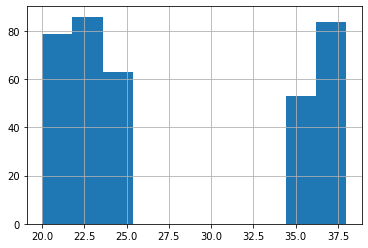

In [28]:
new_cidades_df['Temperatura_C2'].hist()

Analisando o histograma de cada coluna do nosso dataframe, podemos afirmar que o nosso conjunto de dados possui dois picos separados. Ou seja, os dados possuem mais de um lugar para aglomeração

In [34]:
def FindHotDay(df, attribute):

    df=copy.deepcopy(df)
    days_hot=len([1 for  temperature in df[attribute] if temperature<25 ])

    return days_hot    

In [35]:
for city in new_cidades_df.columns:

    print('{} the number of hot days are {}'.format(city, FindHotDay(new_cidades_df, city)))

Temperatura_C1 the number of hot days are 173
Temperatura_C2 the number of hot days are 228


# Questão 3

- a) Faça um boxplot para os valores de temperatura de cada cidade. Em seguida, identifique qual das cidades possui a maior quantidade de outliers nos seus valores de temperatura. Justifique. (1 pt)
- b) Com base no boxplot gerado para a cidade 1, qual é o valor aproximado do quartil Q2? (0.5 pt)
- c) Com base no boxplot gerado para a cidade 2, qual é o valor do quartil Q3? (0.5 pt)

<AxesSubplot:>

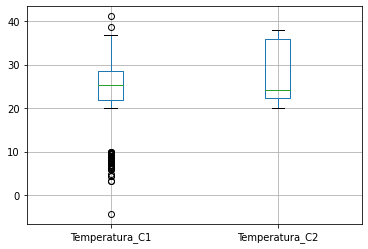

In [43]:
new_cidades_df.boxplot()

Pelos dados, chegamos a conclusão de que a cidade dois não possui outliers. Contudo, a cidade 1 está repleta deles

In [46]:
print('Q2 of city 1 is {}'.format(new_cidades_df['Temperatura_C1'].quantile(0.5)))

Q2 of city 1 is 25.228543556446454


In [47]:
print('Q3 of city 2 is {}'.format(new_cidades_df['Temperatura_C2'].quantile(0.75)))

Q3 of city 2 is 35.988879441761405


# Parte 2

O dataset "Breast Cancer Wisconsin" é um dataset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dataset é conseguir classificar um tumor como benigno ou maligno a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio.

In [48]:
# Removendo valores ausentes por simplicidade
data_df = pd.read_csv("breast-cancer-wisconsin.data", na_values='?').dropna()

In [50]:
data_df.isna().mean()

id                 0.0
clump_thickness    0.0
u_cell_size        0.0
u_cell_shape       0.0
marg_adhesion      0.0
epi_cell_size      0.0
bare_nuclei        0.0
bland_chrom        0.0
norm_nucl          0.0
mitoses            0.0
class              0.0
dtype: float64

# Questão 4 
- a) Reduza o número de atributos escolhendo os 3 mais relevantes. Justifique sua resposta. (1 pt)
- b) Comente a distribuição dos valores de **um** dos atributos selecionados. Sugestão: escolha uma forma de visualização (ex: histograma ou boxplot) e comente momentos calculados a partir dos valores. (1 pt)

<AxesSubplot:>

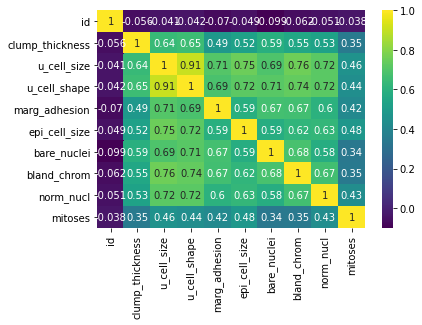

In [66]:
sn.heatmap(data_df.drop(columns='class').corr(), annot=True, cmap='viridis')

In [53]:
def max_min_corr(df):
    '''the function calculates the max and min value of a correlation matrix, obtained from a DataFrame
    Args:
        df, DataFrame
    Return:
        first_max,
        second_max.
        first_min, 
        second_min, 
    '''

    corr_iris=df.corr(method='pearson').abs()
    upper = corr_iris.where(np.triu(np.ones(corr_iris.shape), k=1).astype(np.bool))
    
    first_max=upper.max().dropna().idxmax()
    second_max=upper.idxmax()[str(first_max)]

    first_min=upper.min().dropna().idxmin()
    second_min=upper.idxmin()[str(first_min)]

    print('The variables with more correlation are {} and {}'.format(first_max, second_max))
    print('The variables with less correlation are {} and {}'.format(first_min, second_min))

    return first_max, second_max, first_min, second_min

Para escolher os três atributos mais relevantes, irei excluir os atributos com maior correlação (atributos que quase contém a mesma informação)

In [93]:
reduce_data_df=copy.deepcopy(data_df.drop(columns=['class', 'id']))

In [94]:
while reduce_data_df.columns.shape[0] >3:

    max_1, max_2, min_1, min_2=max_min_corr(reduce_data_df)
    reduce_data_df=reduce_data_df.drop(columns=max_2)

The variables with more correlation are u_cell_shape and u_cell_size
The variables with less correlation are mitoses and bare_nuclei
The variables with more correlation are bland_chrom and u_cell_shape
The variables with less correlation are mitoses and bare_nuclei
The variables with more correlation are bland_chrom and bare_nuclei
The variables with less correlation are mitoses and bare_nuclei
The variables with more correlation are bland_chrom and marg_adhesion
The variables with less correlation are mitoses and bland_chrom
The variables with more correlation are norm_nucl and bland_chrom
The variables with less correlation are mitoses and bland_chrom
The variables with more correlation are norm_nucl and epi_cell_size
The variables with less correlation are mitoses and clump_thickness


In [96]:
reduce_data_df.head()

,clump_thickness,norm_nucl,mitoses
0,5,1,1
1,5,2,1
2,3,1,1
3,6,7,1
4,4,1,1


<AxesSubplot:>

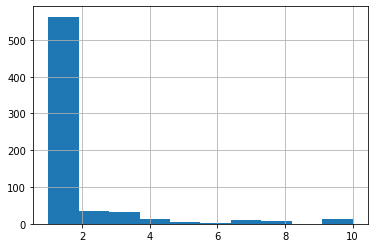

In [102]:
reduce_data_df['mitoses'].hist()

Pelo histograma, podemos ver que o atributo 'mitoses' possui obliquidade e curtose positiva.

In [104]:
print('mitoses kurtosis: {:.7f} skew: {:.7f}'.format(reduce_data_df['mitoses'].kurtosis(), reduce_data_df['mitoses'].skew()))

mitoses kurtosis: 12.2733736 skew: 3.5114762


Devido a isso, podemos esperar que esse atributo também possua um grande número de outliers

C:\Users\wever\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mitoses'>

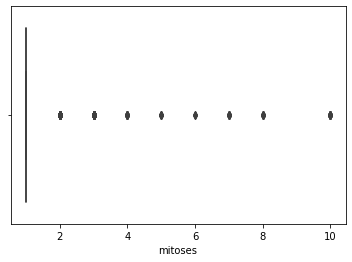

In [105]:
sn.boxplot(reduce_data_df['mitoses'])

e

# Questão 5
- a) Considerando os 10 atributos originais (sem o atributo classe), reduza a dimensionalidade dos dados usando a técnica PCA, mantendo uma variância acima de 90%. (1 pt)
- b) Quantos componentes são necessários para manter a variância de 90%? (1 pt)

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [65]:
scaler=StandardScaler()
pca=PCA()
pipeline=make_pipeline(scaler, pca)
new_data_df=pd.DataFrame(pipeline.fit_transform(data_df.drop(columns=['class']).values))

Text(0.5, 0, 'PCA components')

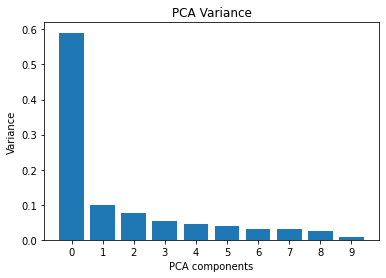

In [60]:
plt.title('PCA Variance')
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xticks(range(pca.n_components_))
plt.ylabel('Variance')
plt.xlabel('PCA components')

In [ ]:
print('6 components were needed for a variance above 90% : {:.9f}'.format(np.sum(pca.explained_variance_ratio_[:6])))

6 components are needed for a variance above 90% : 0.905623010
